In [6]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# Load the dataset
file_path = 'input.csv'
df = pd.read_csv(file_path)

# Calculate Spearman's rank correlation
spearman_corr_mpa_fishery, _ = spearmanr(df['MPA'], df['FisheryConsumption'])
spearman_corr_plastics_fishery, _ = spearmanr(df['Share of global plastics emitted to ocean'], df['FisheryConsumption'])

print(f"Spearman's rank correlation between MPA and FisheryConsumption: {spearman_corr_mpa_fishery}")
print(f"Spearman's rank correlation between Share of global plastics emitted to ocean and FisheryConsumption: {spearman_corr_plastics_fishery}")

# Calculate Kendall's tau correlation
kendall_tau_mpa_fishery, _ = kendalltau(df['MPA'], df['FisheryConsumption'])
kendall_tau_plastics_fishery, _ = kendalltau(df['Share of global plastics emitted to ocean'], df['FisheryConsumption'])

print(f"Kendall's tau correlation between MPA and FisheryConsumption: {kendall_tau_mpa_fishery}")
print(f"Kendall's tau correlation between Share of global plastics emitted to ocean and FisheryConsumption: {kendall_tau_plastics_fishery}")


Spearman's rank correlation between MPA and FisheryConsumption: 0.20239415641574207
Spearman's rank correlation between Share of global plastics emitted to ocean and FisheryConsumption: 0.3436251006786394
Kendall's tau correlation between MPA and FisheryConsumption: 0.1411086353690655
Kendall's tau correlation between Share of global plastics emitted to ocean and FisheryConsumption: 0.24197138087212078


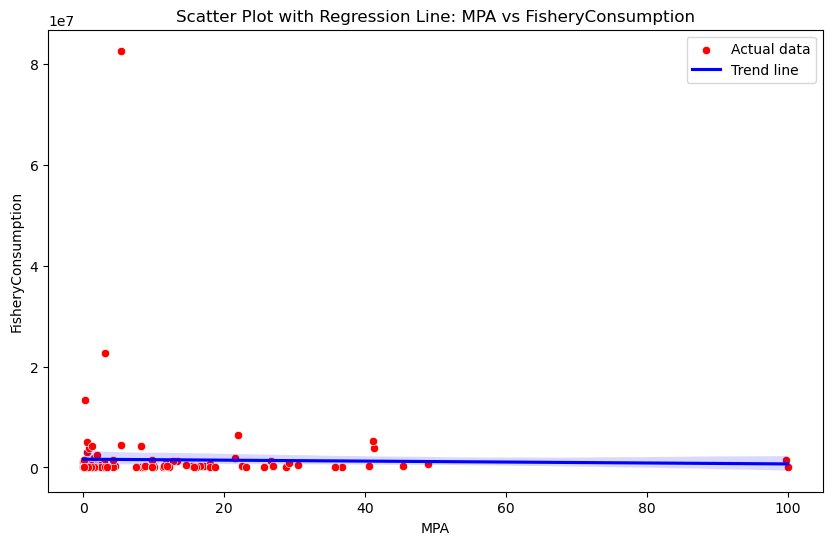

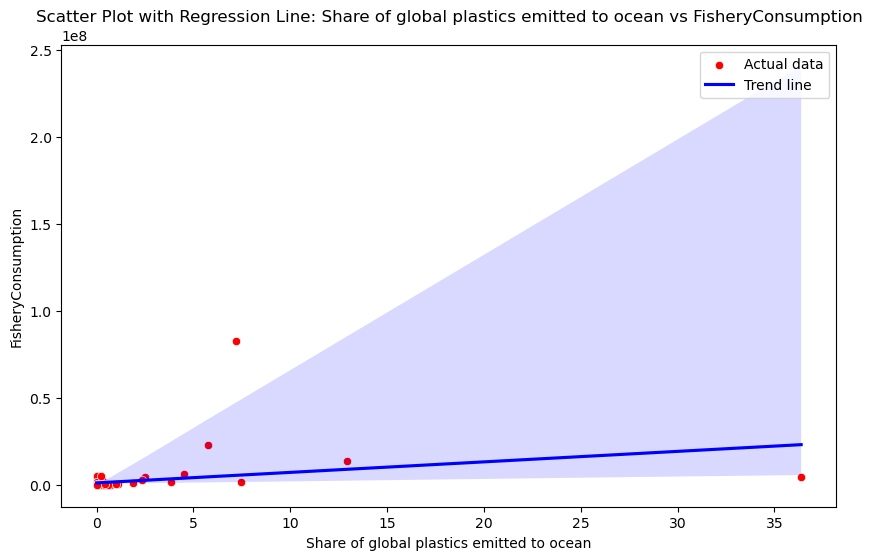

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots with regression lines
def scatter_plot_with_regression(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, color='red', label='Actual data')
    sns.regplot(x=x_col, y=y_col, data=df, scatter=False, color='blue', label='Trend line')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Regression Line: {x_col} vs {y_col}')
    plt.legend()
    plt.show()

# Plot for all pairs
scatter_plot_with_regression(df, 'MPA', 'FisheryConsumption')
scatter_plot_with_regression(df, 'Share of global plastics emitted to ocean', 'FisheryConsumption')


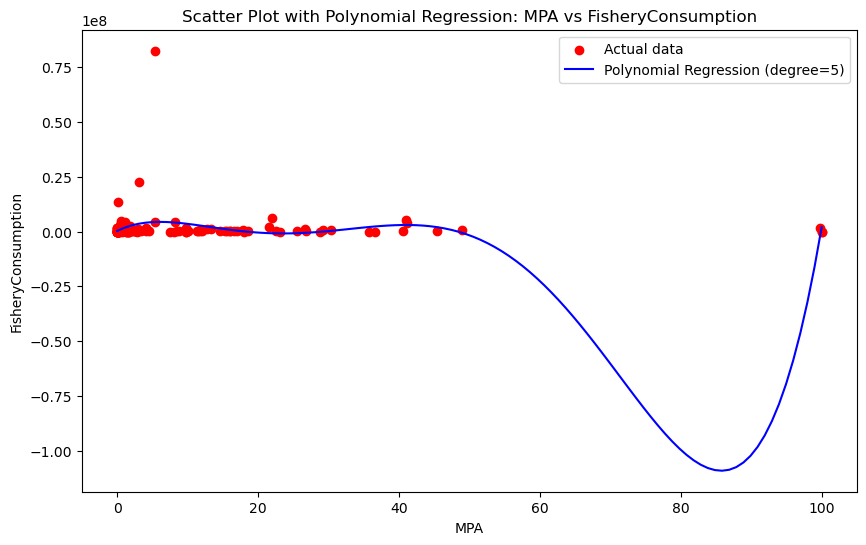

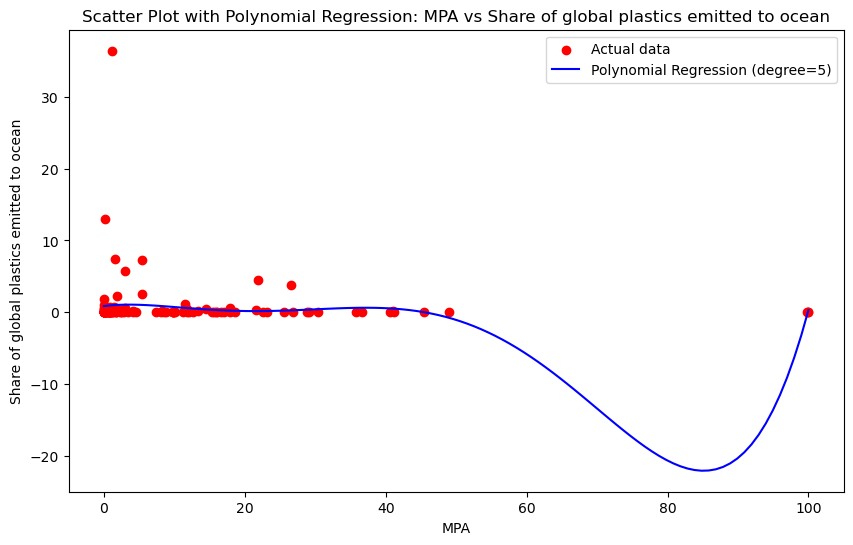

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


columns_of_interest = ['MPA', 'Share of global plastics emitted to ocean', 'FisheryConsumption']
df_subset = df[columns_of_interest]

# Scatter plots with polynomial trend lines
def plot_scatter_with_polynomial(df, x_col, y_col, degree=2):
    X = df[[x_col]].values
    y = df[y_col].values
    
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Make predictions
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Actual data')
    plt.plot(X_range, y_range_pred, label=f'Polynomial Regression (degree={degree})', color='blue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Polynomial Regression: {x_col} vs {y_col}')
    plt.legend()
    plt.show()

# Plot for all pairs
plot_scatter_with_polynomial(df_subset, 'MPA', 'FisheryConsumption', degree=5)
plot_scatter_with_polynomial(df_subset , 'MPA', 'Share of global plastics emitted to ocean', degree=5)
